In [2]:
from tslearn.metrics import dtw as dtw
from matplotlib import pyplot as plt

#importo serie temporali

import pickle
PIK = "ts.dat"
    
with open(PIK, "rb") as f:
    ts = pickle.load(f)

In [3]:

ts.head()

,0,1,2,3,4,5,6,7,8,9,...,379,380,381,382,383,384,385,386,387,388
0,1185.0,1080.0,1280.0,1534.0,1239.0,1304.0,1205.0,1371.0,1287.0,1127.0,...,1320.0,1372.0,1166.0,1106.0,1078.0,1024.0,1013.0,848.0,965.0,929.0
1,1136.0,1044.0,1196.0,1484.0,1239.0,1074.0,1072.0,1161.0,1134.0,1090.0,...,1205.0,1312.0,1079.0,1031.0,963.0,938.0,998.0,818.0,838.0,951.0
2,1094.0,988.0,1184.0,1367.0,1224.0,968.0,998.0,1064.0,999.0,1017.0,...,1099.0,1205.0,1008.0,1015.0,923.0,905.0,923.0,848.0,835.0,938.0
3,1010.0,889.0,1172.0,1344.0,1078.0,929.0,933.0,970.0,961.0,997.0,...,1106.0,1167.0,1034.0,1003.0,853.0,826.0,904.0,826.0,820.0,921.0
4,1011.0,831.0,1147.0,1130.0,1078.0,941.0,883.0,954.0,934.0,945.0,...,1099.0,1122.0,1001.0,951.0,883.0,879.0,884.0,818.0,815.0,850.0


In [4]:
day_list = ts.keys()

dd1 = [ [ (dtw(ts[x],ts[y]) \
           if int(y) > int(x) else -1)  \
         for y in day_list ] 
       for x in day_list ]

matdtw = [ [ (dd1[x][y] if y > x else dd1[y][x])  for y in range(len(day_list)) ] for x in range(len(day_list)) ]
# Finally, the diagonal
for i in range(len(day_list)):
    matdtw[i][i] = 0.0

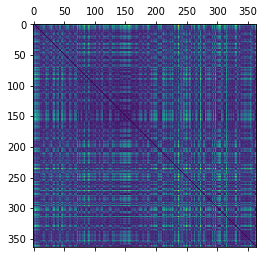

In [5]:
plt.matshow(matdtw, interpolation=None, aspect='auto')

In [6]:
import pickle
PIK = "matdtw.dat"

with open(PIK, "wb") as f:
    pickle.dump(matdtw, f)

In [7]:
import math

def disteu(v,w):
    d=0
    for i in range(len(v)):
        d=d+(v[i]-w[i])*(v[i]-w[i])
    d = math.sqrt(d)
    return d

disteu(ts['0'],ts['0'])

0.0

In [8]:
dd1 = [ [ (disteu(ts[x],ts[y]) \
           if int(y) > int(x) else -1)  \
         for y in day_list ] 
       for x in day_list ]

mateuc = [ [ (dd1[x][y] if y > x else dd1[y][x])  for y in range(len(day_list)) ] for x in range(len(day_list)) ]
# Finally, the diagonal
for i in range(len(day_list)):
    mateuc[i][i] = 0.0

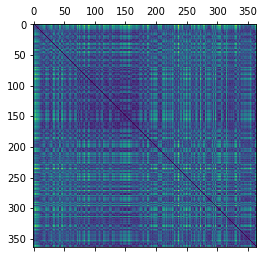

In [9]:
plt.matshow(mateuc, interpolation=None, aspect='auto')

In [10]:
import pickle
PIK = "mateuc.dat"

with open(PIK, "wb") as f:
    pickle.dump(mateuc, f)

# LOAD PICKE

In [1]:
from tslearn.metrics import dtw as dtw
from matplotlib import pyplot as plt
import pickle
   
    
PIK = "ts.dat"
with open(PIK, "rb") as f:
    ts = pickle.load(f)
    
PIK = "mateuc.dat"
with open(PIK, "rb") as f:
    mateuc = pickle.load(f)
    
PIK = "matdtw.dat"      
with open(PIK, "rb") as f:
    matdtw = pickle.load(f)

/home/gambit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """
/home/gambit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  if __name__ == '__main__':
/home/gambit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  del sys.path[0]
/home/gambit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


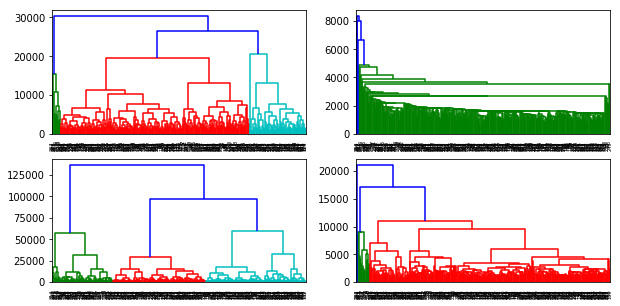

In [2]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure( figsize=(10,5))

plt.subplot(2,2, 1)
linkage_matrix = linkage(matdtw, "complete")
dendrogram(linkage_matrix)

plt.subplot(2, 2, 2)
linkage_matrix = linkage(matdtw, "single")
dendrogram(linkage_matrix)

plt.subplot(2,2, 3)
linkage_matrix = linkage(matdtw, "ward")
dendrogram(linkage_matrix)

plt.subplot(2, 2, 4)
linkage_matrix = linkage(matdtw, "centroid")
dendrogram(linkage_matrix)

plt.show()

/home/gambit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """
/home/gambit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  if __name__ == '__main__':
/home/gambit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  del sys.path[0]
/home/gambit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


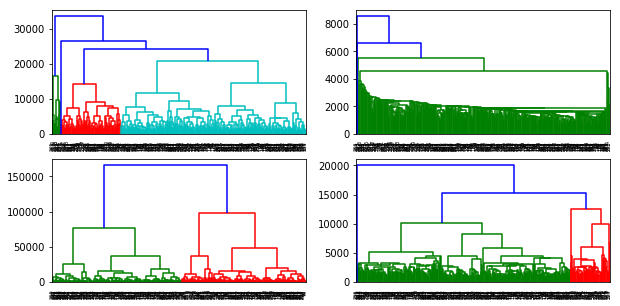

In [3]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
plt.figure( figsize=(10,5))

plt.subplot(2,2, 1)
linkage_matrix = linkage(mateuc, "complete")
dendrogram(linkage_matrix)

plt.subplot(2, 2, 2)
linkage_matrix = linkage(mateuc, "single")
dendrogram(linkage_matrix)

plt.subplot(2,2, 3)
linkage_matrix = linkage(mateuc, "ward")
dendrogram(linkage_matrix)

plt.subplot(2, 2, 4)
linkage_matrix = linkage(mateuc, "centroid")
dendrogram(linkage_matrix)

plt.show()

In [ ]:
#scegliamo ward -> perchè? scegliere una validation

/home/gambit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


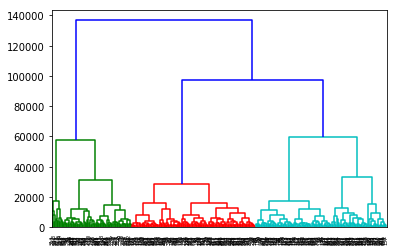

In [147]:
linkage_matrix_dtw = linkage(matdtw, "ward")
dendrogram(linkage_matrix_dtw)

plt.show()


In [157]:
cutree_dtw = cluster.hierarchy.cut_tree(linkage_matrix_dtw)
cutree_dtw[:,360]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0,
       0, 1, 0, 0, 2, 1, 1, 3, 3, 1, 1, 0, 0, 1, 1, 2, 1, 0, 1, 0, 0, 2,
       2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1, 2,
       1, 0, 0, 0, 0, 3, 3, 1, 2, 3, 3, 2, 1, 2, 2, 2, 2, 3, 2, 2, 1, 1,
       2, 2, 3, 3, 2, 1, 2, 2, 2, 1, 1, 2, 2, 3, 1, 1, 1, 1, 1, 2, 3, 2,
       1, 1, 0, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 3, 2, 3,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2,
       2, 3, 3, 3, 3, 2, 2, 1, 2, 1, 1, 1, 1, 3, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 3, 3, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 3, 3, 2, 1, 2, 3, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 3, 2, 2, 2, 1, 2, 2, 3, 3, 2, 0, 1, 0,
       3, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 3, 1, 1, 1, 3, 3, 2,
       1, 0, 3, 1, 3, 3, 2, 0, 0, 1, 2, 1, 3, 3, 3, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 3, 1, 0, 3, 1, 0, 0, 2, 3, 3,

/home/gambit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


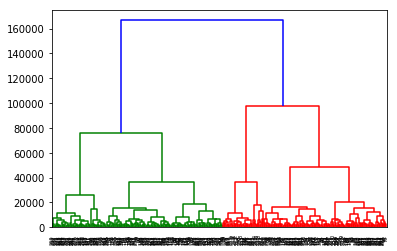

In [149]:
linkage_matrix_euc = linkage(mateuc, "ward")
dendrogram(linkage_matrix_euc)

plt.show()

In [158]:
cutree_euc = cluster.hierarchy.cut_tree(linkage_matrix_euc)
cutree_euc[:,360]


array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 3, 3, 0, 0, 1, 1, 2, 2, 2, 0, 0, 0, 1, 0, 3,
       2, 0, 1, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 2, 3, 2, 2, 3, 3, 2, 0, 2, 2, 2, 2, 3, 2, 2, 0, 0,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 3, 2,
       0, 0, 0, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 3, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2,
       2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 3, 2, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 2, 3, 2, 0, 0, 0, 0, 0, 3, 3, 2, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 2, 0, 2, 3, 2, 0, 2, 3, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 3, 3, 2, 2, 0, 2, 0, 3, 3, 2, 0, 0, 0,
       3, 2, 1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 1, 1, 2, 3, 0, 0, 2, 3, 3, 2,
       0, 1, 3, 2, 3, 3, 2, 0, 1, 2, 2, 0, 3, 3, 3, 2, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 1, 3, 0, 1, 1, 2, 3, 3,

In [188]:
def switch(x):
    if x==1:
        return 0
    elif x==0:
        return 1
    else:
        return x

hier = ts.T
hier['dtw']=cutree_dtw[:,360]
hier['euc']=[switch(x) for x in cutree_euc[:,360]]

import matplotlib.pyplot as plt


In [193]:
#coincidono i metodi ?

sum(hier['dtw']==hier['euc'])/len(hier)

0.728021978021978

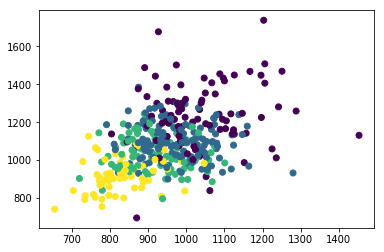

In [190]:

plt.scatter(hier.iloc[:,6],hier.iloc[:,23], c=hier['dtw'])


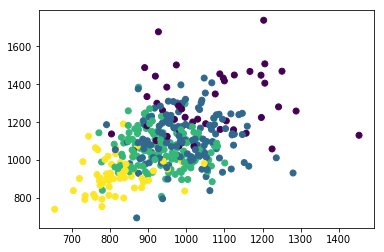

In [189]:
plt.scatter(hier.iloc[:,6],hier.iloc[:,23], c=hier['euc'])


In [ ]:
#stampare anche matrice distanze ordinata / confronto matrice ottimale